In [22]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import artist


In [164]:
# Teff, L/Lsun, BINAS 32A
stars = {
'Zon' : (np.log10(5.78e3), np.log10(1), 'right'),
'Sirius A' : (np.log10(9.9e3), np.log10(26), 'left'),
'Sirius B' : (np.log10(24.8e3), np.log10(0.024), 'right'),
'Rigel'    : (np.log10(10.5e3), np.log10(65000), 'left'),
'Deneb'    : (np.log10(9.0e3), np.log10(50000), 'right'),
'Aldebaran': (np.log10(3.6e3), np.log10(650), 'left'),
'Arcturus' : (np.log10(4.4e3), np.log10(185), 'left'),
'Betelgeuze':(np.log10(3.6e3), np.log10(80000), 'below left'),
'B Cen'    : (np.log10(24e3), np.log10(60000), 'right'),
}
for k,v in stars.items():
    print(k,v)

Zon (3.761927838420529, 0.0, 'right')
Sirius A (3.99563519459755, 1.414973347970818, 'left')
Sirius B (4.394451680826216, -1.6197887582883939, 'right')
Rigel (4.021189299069938, 4.812913356642856, 'left')
Deneb (3.9542425094393248, 4.698970004336019, 'right')
Aldebaran (3.5563025007672873, 2.8129133566428557, 'left')
Arcturus (3.6434526764861874, 2.2671717284030137, 'left')
Betelgeuze (3.5563025007672873, 4.903089986991944, 'below left')
B Cen (4.380211241711606, 4.778151250383644, 'right')


In [3]:
filename = 'hipparcos_met_ePlx.tsv'
df = pd.read_table(filename, skiprows=44, sep=';', header=None, index_col=0,
                   names = ['HIP', 'Vmag', 'Plx', 'e_Plx', 'B-V', 'SpType'],
                   skipfooter=1, engine='python')

In [4]:
df.head()

,Vmag,Plx,e_Plx,B-V,SpType
HIP,,,,,
2,9.27,21.90,3.10,0.999,K3V
3,6.61,2.81,0.63,-0.019,B9
4,8.06,7.75,0.97,0.370,F0V
5,8.55,2.87,1.11,0.902,G8III
6,12.31,18.80,4.99,1.336,M0V:


In [5]:
df.describe()

,Vmag,Plx,e_Plx,B-V,SpType
count,118217,118217,118217,118217,115183
unique,1127,5617,1353,2437,4124
top,8.69,,0.91,,K0
freq,504,263,1423,1281,8570


In [6]:
df_clean = df.applymap(lambda x: np.nan if isinstance(x, str)
                       and x.isspace() else x)
df.describe()

,Vmag,Plx,e_Plx,B-V,SpType
count,118217,118217,118217,118217,115183
unique,1127,5617,1353,2437,4124
top,8.69,,0.91,,K0
freq,504,263,1423,1281,8570


In [7]:
df_clean= df_clean.dropna()
df_clean.describe()

,Vmag,Plx,e_Plx,B-V,SpType
count,114471,114471,114471,114471,114471
unique,1072,5361,1056,2426,4070
top,8.69,2.93,0.91,1.000,K0
freq,502,182,1422,308,8537


In [8]:
df_clean.shape

(114471, 5)

In [9]:
def ballesteros(BV):
    """return Teff from Johnson's B-V"""
    return 4600*(1/(0.92*BV+1.7)+1/(0.92*BV+0.62))
ballesteros(0.656) # Sun

5756.588112693915

In [10]:
def M_to_L(M):
    """absolute magnitude to L/Lsun"""
    return 2.512**(4.83 - M)
M_to_L(4.83), M_to_L(1.42)  # Sun (1), Sirius A (25)

(1.0, 23.124212707695087)

In [11]:
df_clean['Vmag'] = df_clean['Vmag'].astype(np.float)
df_clean['Plx'] = df_clean['Plx'].astype(np.float)
df_clean['e_Plx'] = df_clean['e_Plx'].astype(np.float)
df_clean['B-V'] = df_clean['B-V'].astype(np.float)
# Add a new column with the absolute magnitude
df_clean['M_V'] = df_clean['Vmag'] + 5 * np.log10(df_clean['Plx']/100.)
df_clean['L'] = df_clean['M_V'].map(M_to_L)
df_clean['Teff'] = df_clean['B-V'].map(ballesteros)
df_clean.head()

D:\Miniconda3\envs\py38\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\Miniconda3\envs\py38\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Vmag,Plx,e_Plx,B-V,SpType,M_V,L,Teff
HIP,,,,,,,,
2,9.27,21.90,3.10,0.999,K3V,5.972221,0.349212,4745.140425
3,6.61,2.81,0.63,-0.019,B9,-1.146468,245.869529,10368.595588
4,8.06,7.75,0.97,0.370,F0V,2.506509,8.500456,7044.130880
5,8.55,2.87,1.11,0.902,G8III,0.839409,39.474311,4991.060700
6,12.31,18.80,4.99,1.336,M0V:,8.680789,0.028814,4058.107348


In [204]:
df_smalle = df_clean[df_clean['e_Plx'] / df_clean['Plx'] < 0.1]
df_smalle = df_smalle.dropna()
df_smalle.describe()

,Vmag,Plx,e_Plx,B-V,M_V,L,Teff
count,20469.000000,20469.000000,20469.000000,20469.000000,20469.000000,20469.000000,20469.000000
mean,7.547378,19.456991,0.988432,0.631388,3.550640,18.781931,6199.260759
std,1.542982,20.614424,0.506969,0.351972,2.162762,162.449420,1551.384989
min,-1.440000,4.550000,0.380000,-0.400000,-5.528578,0.000057,2803.663902
25%,6.620000,10.730000,0.720000,0.429000,2.130189,1.115827,5180.242354
50%,7.650000,14.580000,0.890000,0.584000,3.477528,3.475486,6030.905633
75%,8.510000,21.420000,1.100000,0.834000,4.711014,12.022015,6729.488460
max,12.880000,772.330000,22.430000,2.400000,15.449015,13919.857024,21707.421707


In [216]:
df_giants = df_clean[df_clean['e_Plx'] / df_clean['Plx'] < .1]
df_giants = df_giants[df_giants['L'] > 10]
df_giants = df_giants[df_giants['L'] < 1e6]
df_giants = df_giants[df_giants['L'] < 1e6]
df_giants = df_giants[df_giants['Teff'] < 6e3]
df_giants = df_giants.dropna()
df_giants.describe()

,Vmag,Plx,e_Plx,B-V,M_V,L,Teff
count,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000
mean,5.725095,11.099866,0.696544,1.086335,0.751273,65.791760,4581.370865
std,1.098784,6.226983,0.160073,0.186040,0.836442,175.487291,394.304387
min,-0.050000,4.790000,0.430000,0.594000,-4.576751,10.041381,3549.268789
25%,5.140000,7.750000,0.560000,0.967000,0.376371,27.438390,4378.568915
50%,5.890000,9.540000,0.690000,1.052000,0.832413,39.729504,4621.258666
75%,6.475000,12.200000,0.805000,1.165000,1.234280,60.469860,4823.392749
max,8.110000,96.740000,2.900000,1.674000,2.325639,5792.756843,5991.135977


In [245]:
df_sgiants = df_clean[df_clean['e_Plx'] / df_clean['Plx'] < 1]
df_sgiants = df_sgiants[df_sgiants['L'] > 1e4]
df_sgiants = df_sgiants[df_sgiants['L'] < 1e6]
df_sgiants = df_sgiants.dropna()
df_sgiants.describe()

,Vmag,Plx,e_Plx,B-V,M_V,L,Teff
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,3.427073,1.842927,0.635610,0.408317,-5.966911,29439.073817,8363.058268
std,1.628633,1.929627,0.223607,0.634633,0.760211,41381.533811,3327.965609
min,-0.620000,0.520000,0.400000,-0.269000,-8.728393,10010.289823,2937.274647
25%,2.230000,0.720000,0.510000,-0.063000,-6.381969,12317.805766,5706.318906
50%,3.770000,1.020000,0.560000,0.211000,-5.709643,16446.147107,8078.841099
75%,4.770000,2.140000,0.720000,0.670000,-5.395831,30549.745775,10985.864245
max,6.050000,10.430000,1.680000,2.242000,-5.170626,265230.505109,15515.240213


In [253]:
df_dwarfs = df_clean[df_clean['e_Plx'] / df_clean['Plx'] < 100]
df_dwarfs = df_dwarfs[df_dwarfs['L'] < 1e-2]
df_dwarfs = df_dwarfs[df_dwarfs['Teff'] > 6e3]
df_dwarfs = df_dwarfs.dropna()
df_dwarfs.describe()

,Vmag,Plx,e_Plx,B-V,M_V,L,Teff
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,12.190625,82.280625,3.897500,0.017250,11.402787,0.003125,10343.663494
std,0.549005,57.900351,1.854833,0.186426,1.034152,0.001867,1920.703516
min,11.010000,31.260000,1.460000,-0.199000,10.204945,0.000187,6153.698972
25%,11.927500,45.830000,2.382500,-0.101500,10.754224,0.001848,9117.771801
50%,12.340000,65.095000,3.690000,-0.033500,11.076511,0.003174,10573.378489
75%,12.550000,89.592500,4.592500,0.092500,11.680151,0.004268,11599.131496
max,12.790000,226.950000,8.330000,0.554000,14.149651,0.007078,13560.703669


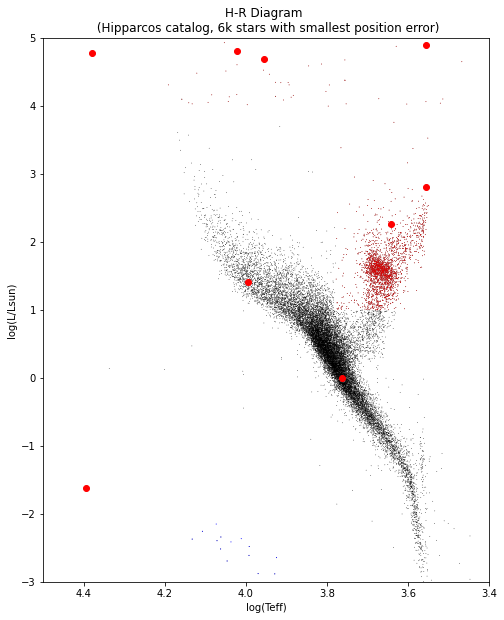

In [254]:
plt.rcParams['axes.grid'] = False
fig, ax = plt.subplots(figsize=(8,10))

plt.xlim([4.5, 3.4])
plt.ylim([-3, 5])

plt.title('H-R Diagram \n (Hipparcos catalog, 6k stars with smallest position error)')
plt.xlabel('log(Teff)')
plt.ylabel('log(L/Lsun)')
plt.scatter(np.log10(df_smalle['Teff']), np.log10(df_smalle['L']),
            s=0.5, edgecolors='none', c='k')
plt.scatter(np.log10(df_giants['Teff']), np.log10(df_giants['L']),
            s=0.5, edgecolors='none', c='red')
plt.scatter(np.log10(df_sgiants['Teff']), np.log10(df_sgiants['L']),
            s=1, edgecolors='none', c='brown')
plt.scatter(np.log10(df_dwarfs['Teff']), np.log10(df_dwarfs['L']),
            s=1, edgecolors='none', c='blue')
for k,v in stars.items():
    plt.scatter(v[0], v[1], c='red')
plt.show()

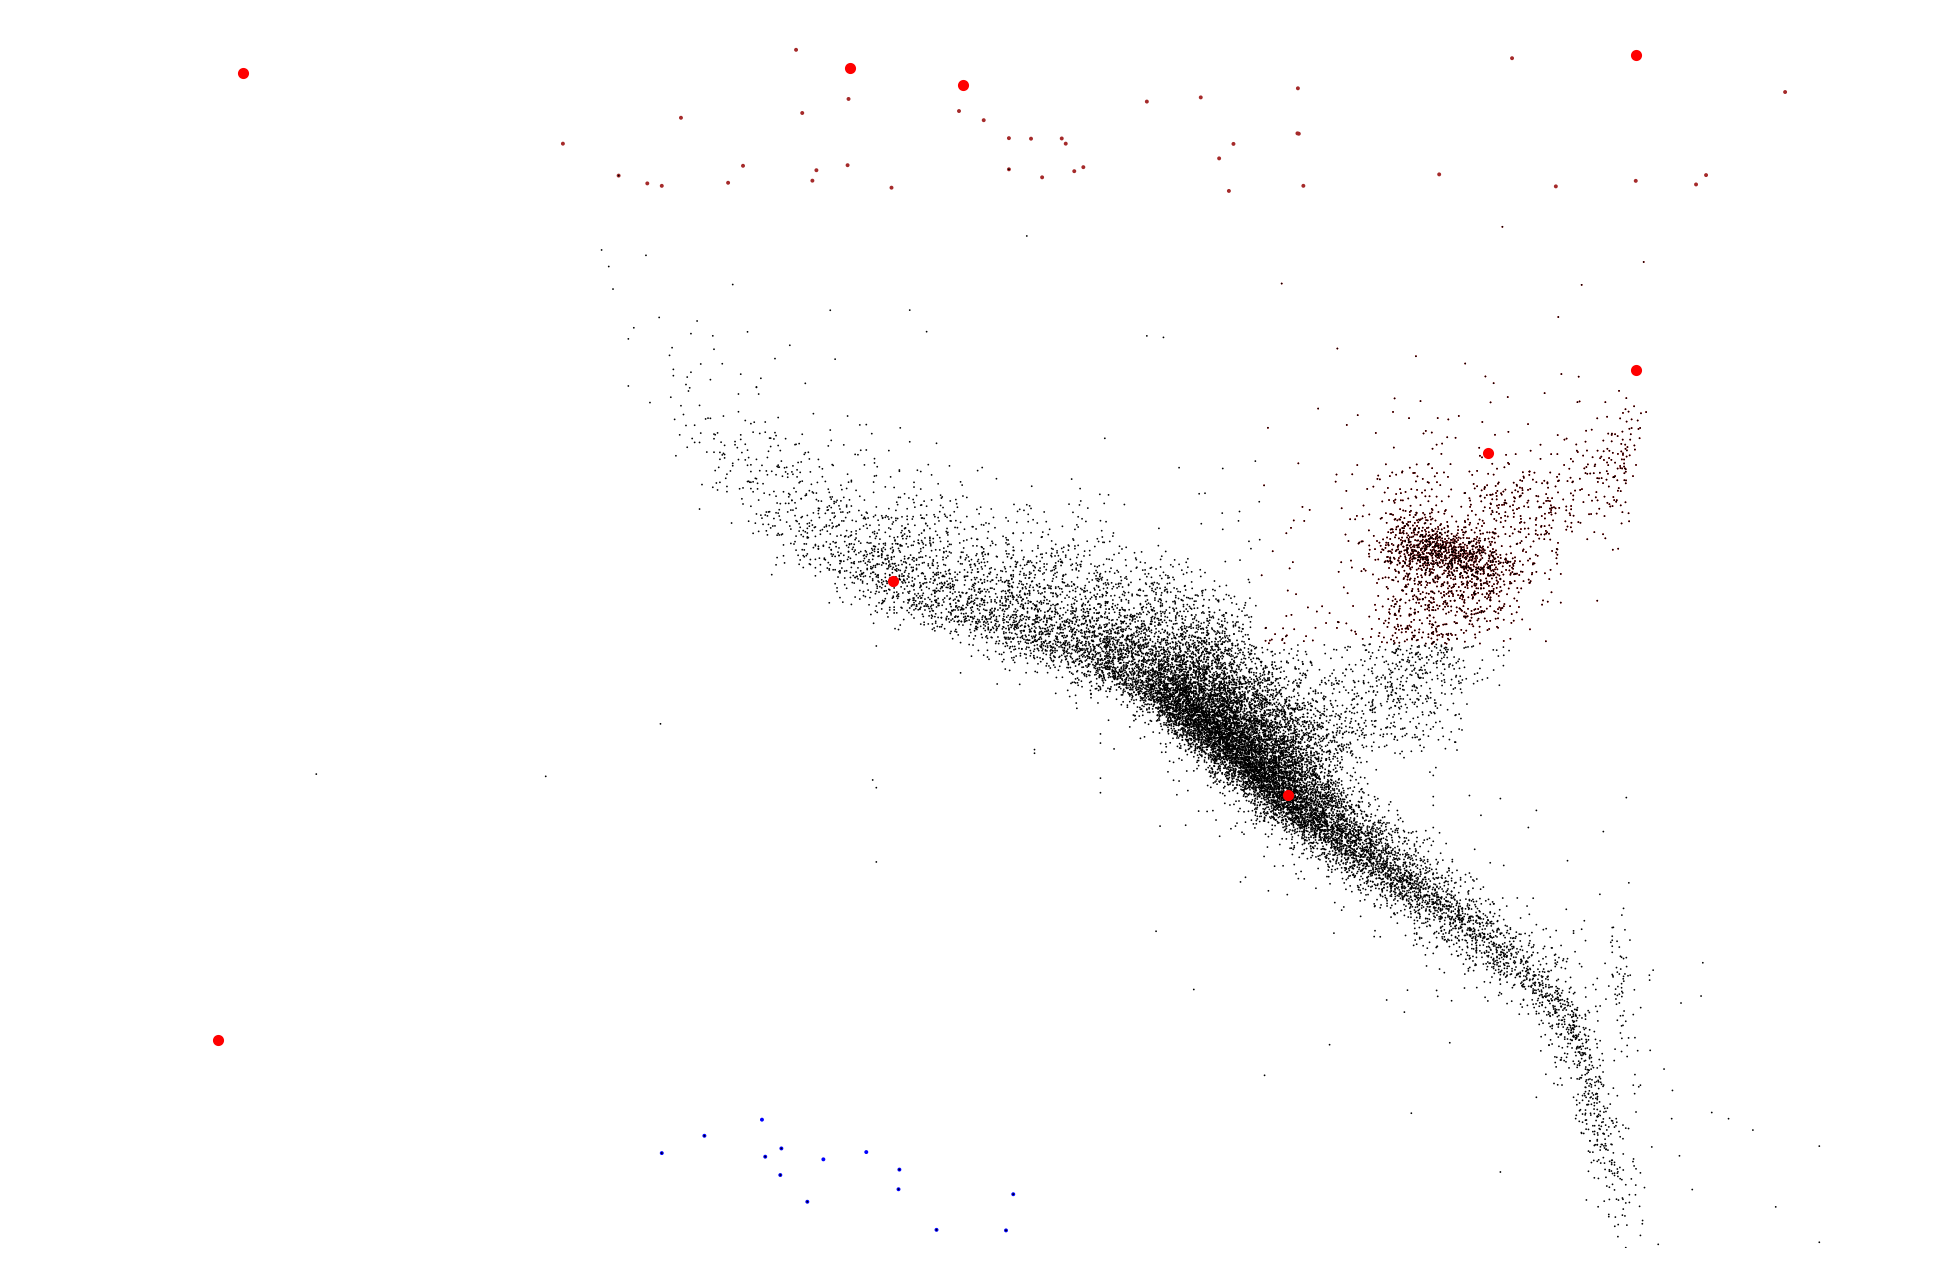

In [257]:
plt.figure(dpi=400)

plt.scatter(np.log10(df_giants['Teff']), np.log10(df_giants['L']),
            s=.1, edgecolors='none', c='red')
plt.scatter(np.log10(df_sgiants['Teff']), np.log10(df_sgiants['L']),
            s=.5, edgecolors='none', c='brown')
plt.scatter(np.log10(df_dwarfs['Teff']), np.log10(df_dwarfs['L']),
            s=.5, edgecolors='none', c='blue')
plt.scatter(np.log10(df_smalle['Teff']), np.log10(df_smalle['L']),
           s=.1, edgecolors='none', c='k')
for k,v in stars.items():
    plt.scatter(v[0], v[1], c='red', s=1)
plt.xlim([4.5, 3.4])
plt.ylim([-3, 5])
plt.axis('off')
#plt.show()
plt.savefig("hrbg.png", dpi=400)

In [256]:

# make graph
graph = artist.Plot()

# make Plot
graph.scatter(np.log10(df_smalle['Teff']), np.log10(df_smalle['L']), 
              markstyle='mark size=.1', mark='*')

for k, v in stars.items():
    print(k, v)
    graph.scatter([v[0]], [v[1]], markstyle='mark size=2, color=blue', mark='*')
    graph.add_pin_at_xy(v[0], v[1], k, location=v[2],
                            use_arrow=False, style='gray, label distance=1ex')

# NL getallen 1000 ipv 1,000 voor duizend en komma voor decimaalteken
graph.set_axis_options('/pgf/number format/.cd,\n'
                       'use comma,\n'
                       '1000 sep={},\n'
                       'x dir=reverse,\n'  # draai x as om
                       'grid=major')

graph.set_xlimits(3.4, 4.5)
graph.set_ylimits(-3, 5)

# set ticks at every unit along the y axis
#graph.set_yticks(np.arange(0, 5000, 500))
#graph.set_xticks(np.arange(0, 6000, 1000))

#graph.set_xlabel(r'golflengte $\left[\si{\nano\meter}\right]$')

# save graph to file
graph.save(f'HRdiagram')

Zon (3.761927838420529, 0.0, 'right')
Sirius A (3.99563519459755, 1.414973347970818, 'left')
Sirius B (4.394451680826216, -1.6197887582883939, 'right')
Rigel (4.021189299069938, 4.812913356642856, 'left')
Deneb (3.9542425094393248, 4.698970004336019, 'right')
Aldebaran (3.5563025007672873, 2.8129133566428557, 'left')
Arcturus (3.6434526764861874, 2.2671717284030137, 'left')
Betelgeuze (3.5563025007672873, 4.903089986991944, 'below left')
B Cen (4.380211241711606, 4.778151250383644, 'right')


In [146]:
for k, v in stars.items():
    print(k,v)

Sirius A (3.99563519459755, 1.414973347970818)
Sirius B (4.394451680826216, -1.6197887582883939)
Rigel (4.021189299069938, 4.812913356642856)
Deneb (3.9542425094393248, 4.698970004336019)
Aldebaran (3.5563025007672873, 2.8129133566428557)
Arcturus (3.6434526764861874, 2.2671717284030137)
Betelgeuze (3.5563025007672873, 4.903089986991944)
B Cen (4.380211241711606, 4.778151250383644)
